# Template Notebook

## Setup

### Standard library imports

In [127]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

### Standard library imports

### Thrid Party libraries imports

In [129]:
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

### Modules imports

In [148]:
%autoreload 2

from source.operators.continuous import vectorized_crossover, vectorized_mutation
from source.operators.multiobjective import (
    _compare_in_dims,
    assign_pareto_strength,
    strength_binary_tournament_selection,
    strength_n_fittest_selection,
    strength_binary_tournament_selection,
    is_non_dominated_solution,
)
from source.spea_optimizer import SPEAOptimizer

### Paths

In [131]:
def schaffer_function(x):  # soruce: https://www.researchgate.net/publication/2446107_A_Multiobjective_Evolutionary_Algorithm_The_Study_Cases
    return [x**2, (x - 2)**2]

In [132]:
optimzier = SPEAOptimizer(schaffer_function, 1, "min")

In [133]:
history = optimzier.optimize(
    num_epochs=10,
    population_size=100,
    crossover_rate=0.5,
    mutation_rate=0.4,
    selection_operator="n_fittest",
    reducing_period=1,
    search_range=((-10, 10),),
    mutation_strength=1,
    relative_mutation_strength=False,
    clustering_parameters={"max_iter": 50},
    silent=False,
    logging=True,
)

100%|██████████| 10/10 [00:00<00:00,  7.41it/s]


In [134]:
history.shape

(100, 1)

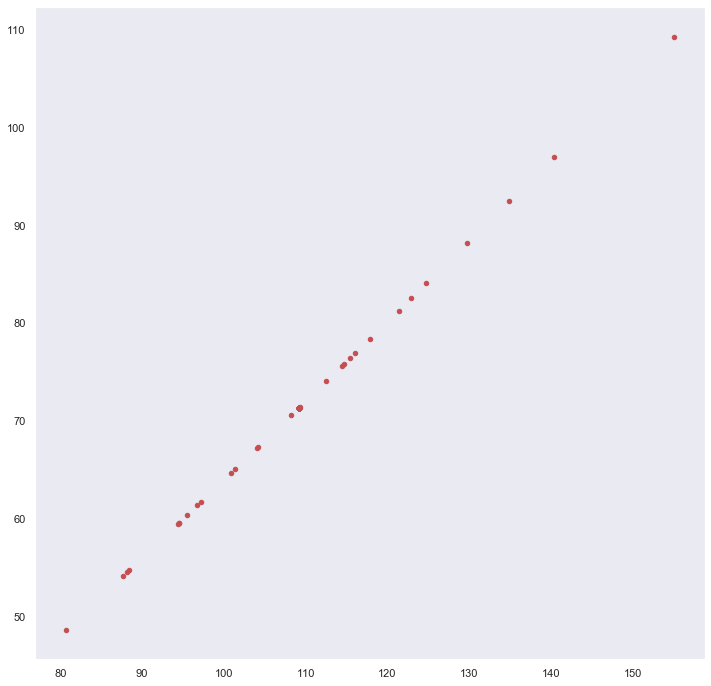

In [135]:
plt.figure(figsize=[12, 12])
sns.set()

values = np.apply_along_axis(schaffer_function, 0, history)
plt.scatter(values[0, :], values[1, :], c="r", s=20)

plt.grid()

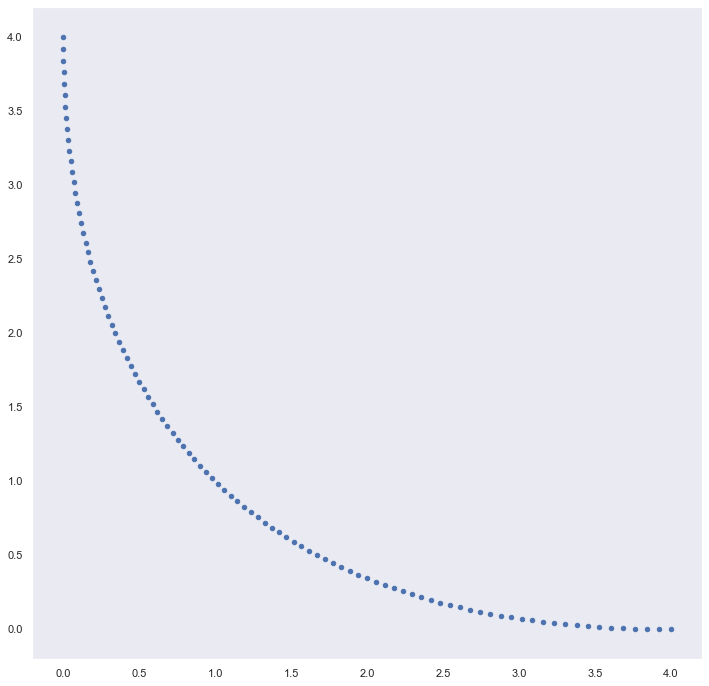

In [136]:
plt.figure(figsize=[12, 12])
sns.set()

t = np.linspace(0, 2, 100)
t_values = np.apply_along_axis(schaffer_function, 0, t)
plt.scatter(t_values[0, :], t_values[1, :], c="b", s=20)

plt.grid()

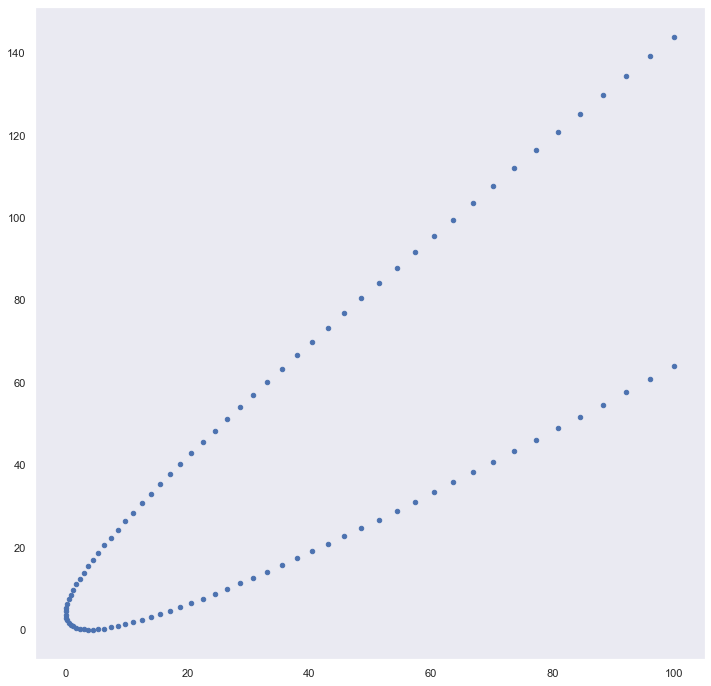

In [137]:
plt.figure(figsize=[12, 12])
sns.set()

t = np.linspace(-10, 10, 100)
t_values = np.apply_along_axis(schaffer_function, 0, t)
plt.scatter(t_values[0, :], t_values[1, :], c="b", s=20)

plt.grid()

In [138]:
x = np.linspace(0, 5, 10)
x = x.reshape(-1, 1)

In [139]:
solutions = np.apply_along_axis(schaffer_function, 1, x)
single = solutions[5]

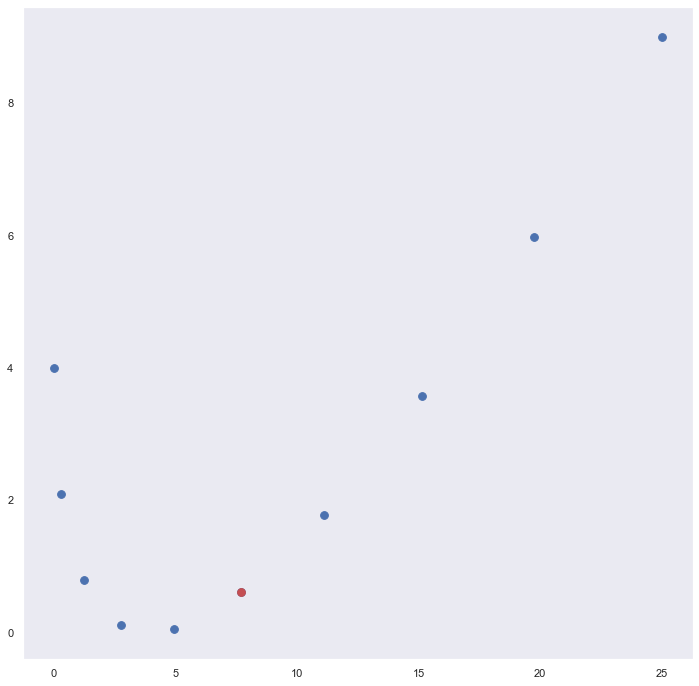

In [140]:
plt.figure(figsize=[12, 12])
sns.set()

plt.scatter(solutions[:, 0], solutions[:, 1], c="b", s=60)
plt.scatter(single[0], single[1], c="r", s=60)

plt.grid()

In [152]:
for single in solutions:
    print(f"{assign_pareto_strength(single, solutions, mode='min')}")

3
4
5
6
6
5
4
3
2
1
